<a href="https://colab.research.google.com/github/jayeshraj619/AI-LAB/blob/master/predvalu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [82]:
df = pd.read_csv("/content/spi3lagged.csv")
df

,date,maxtemp,rh,soil.moisture,root soil wetness,surface soil wetness,sl1,sl2,spi3
0,01-03-1981,32.041786,62.846786,0.354643,0.453929,0.453214,-0.948040,-0.771554,-0.609626
1,01-04-1981,33.429355,62.240000,0.238065,0.415161,0.417097,-0.609626,-0.948040,-0.237465
2,01-05-1981,32.831333,69.870333,0.292667,0.416333,0.414333,-0.237465,-0.609626,0.035132
3,01-06-1981,30.221613,77.254839,0.502258,0.505161,0.494194,0.035132,-0.237465,1.642811
4,01-07-1981,27.278000,86.731000,0.925000,0.900667,0.875667,1.642811,0.035132,1.162105
...,...,...,...,...,...,...,...,...,...
485,01-08-2021,27.359032,89.194839,0.959355,0.975161,0.961613,1.277979,0.848941,0.710179
486,01-09-2021,27.448710,88.669355,0.934194,0.960000,0.939355,0.710179,1.277979,0.685178
487,01-10-2021,27.761667,88.440000,0.935333,0.959333,0.940000,0.685178,0.710179,0.800410
488,01-11-2021,28.322581,86.146774,0.939355,0.960968,0.943226,0.800410,0.685178,0.550892


In [55]:
del df["date"]

In [56]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [57]:
# Scaling the entire dataset

dataset = df
values = dataset.values

#values = values.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df[["maxtemp"	,"rh"	,"soil.moisture"	,"root soil wetness"	,"surface soil wetness"	,"sl1"	,"sl2",	"spi3"]])
print(scaled.shape)

(490, 8)


In [58]:
tf = pd.DataFrame(scaled, columns = ["maxtemp"	,"rh",	"soil.moisture",	"root soil wetness",	"surface soil wetness",	"sl1",	"sl2",	"spi1"])
tf

,maxtemp,rh,soil.moisture,root soil wetness,surface soil wetness,sl1,sl2,spi1
0,0.768310,0.160905,0.218374,0.102063,0.094036,0.121434,0.175201,0.224534
1,0.949373,0.143131,0.073708,0.037476,0.032524,0.224534,0.121434,0.337915
2,0.871338,0.366635,0.141466,0.039429,0.027817,0.337915,0.224534,0.420964
3,0.530797,0.582937,0.401553,0.187417,0.163828,0.420964,0.337915,0.910755
4,0.146687,0.860508,0.926145,0.846333,0.813519,0.910755,0.420964,0.764304
...,...,...,...,...,...,...,...,...
485,0.157261,0.932677,0.968777,0.970442,0.959895,0.799606,0.668897,0.626622
486,0.168963,0.917285,0.937553,0.945183,0.921987,0.626622,0.799606,0.619005
487,0.209800,0.910567,0.938968,0.944072,0.923085,0.619005,0.626622,0.654111
488,0.282993,0.843395,0.943958,0.946795,0.928579,0.654111,0.619005,0.578094


In [59]:
values = tf.values

# We train the model on the 1st 3 years and then test on the last year (for now)
n_train_hours = 390

train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D :- (no.of samples, no.of timesteps, no.of features)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(390, 1, 7) (390,) (100, 1, 7) (100,)


In [60]:
train.shape, test.shape, values.shape

((390, 8), (100, 8), (490, 8))

In [61]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization,GRU
from tensorflow.keras.models import Sequential

In [62]:
model = Sequential()
model.add(LSTM(1000, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.8))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()
# fit network
history = model.fit(train_X, train_y, epochs=70, batch_size=25, validation_split=0.2, verbose=2, shuffle=False)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 1000)              4032000   
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 4,033,001
Trainable params: 4,033,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/70
13/13 - 3s - loss: 0.0937 - val_loss: 0.0565 - 3s/epoch - 266ms/step
Epoch 2/70
13/13 - 1s - loss: 0.0493 - val_loss: 0.0487 - 877ms/epoch - 67ms/step
Epoch 3/70
13/13 - 1s - loss: 0.0407 - val_loss: 0.0477 - 560ms/epoch - 43ms/step
Epoch 4/70
13/13 - 1s - loss: 0.0366 - val_loss: 0.0414 - 568ms/

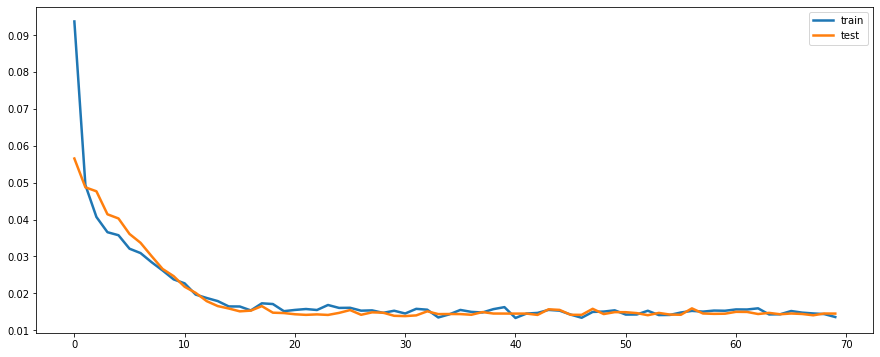

In [74]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'], label='train', linewidth = 2.5)
plt.plot(history.history['val_loss'], label='test',  linewidth = 2.5)
plt.legend()
plt.show()

In [75]:
test_X.shape

(100, 1, 7)

In [76]:
testPredict = model.predict(test_X)
print(testPredict.shape)
testPredict = testPredict.ravel()

print(testPredict.shape)

(100, 1)
(100,)


In [78]:
y_test_true = test[:,7]

In [ ]:
poll = np.array(df['spi3'])
print(poll.shape)
meanop = poll.mean()
stdop = poll.std()
print(testPredict.shape)
y_test_true = y_test_true*stdop + meanop
testPredict = testPredict*stdop + meanop

testPredict.shape

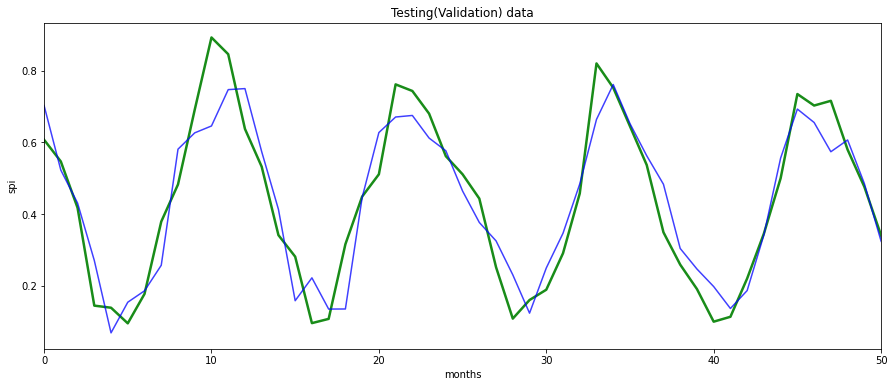

(100,)


In [79]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,6))
plt.xlim([0,50])
plt.ylabel("spi")
plt.xlabel("months")

plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()
#testPredict=testPredict.reshape(-1,1)
print(testPredict.shape)
#testTrue = scaler.inverse_transform(testPredict)

In [68]:
from sklearn.metrics import r2_score
r=r2_score(y_test_true, testPredict)
print("r2socre ="  ,r)
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

r2socre = 0.8374808522975971
Test(Validation) RMSE = 0.09366503025997241


In [69]:
testPredict

array([0.7030673 , 0.5226696 , 0.43061668, 0.27012247, 0.06772374,
       0.15336004, 0.1852426 , 0.25664574, 0.58107466, 0.6267379 ,
       0.64595705, 0.74752635, 0.75038624, 0.57404655, 0.41298193,
       0.15757439, 0.22152439, 0.13423225, 0.13446262, 0.445799  ,
       0.6275409 , 0.67098397, 0.6753321 , 0.6121641 , 0.5766284 ,
       0.46415097, 0.3762726 , 0.32476652, 0.22991285, 0.1228032 ,
       0.2489875 , 0.34619918, 0.48382857, 0.6642502 , 0.7617882 ,
       0.65257007, 0.5627911 , 0.48299605, 0.30367452, 0.2462033 ,
       0.19712526, 0.1358417 , 0.18598312, 0.34150898, 0.55632555,
       0.69318146, 0.65566134, 0.5739338 , 0.6068062 , 0.48518252,
       0.3242054 , 0.23660669, 0.13839433, 0.18215004, 0.15072627,
       0.363743  , 0.5867956 , 0.75391036, 0.5833674 , 0.63177717,
       0.6246622 , 0.41550326, 0.2869608 , 0.26728135, 0.26618543,
       0.07939731, 0.17044213, 0.29438454, 0.54826134, 0.6279531 ,
       0.7003612 , 0.6275454 , 0.69043434, 0.57616484, 0.52437

In [70]:
gf = pd.DataFrame(testPredict) 
gf

,0
0,0.703067
1,0.522670
2,0.430617
3,0.270122
4,0.067724
...,...
95,0.654175
96,0.553244
97,0.496050
98,0.491585


In [71]:
sf = pd.read_csv("/content/TEST3.csv")
sf
scaler = MinMaxScaler(feature_range=(0, 1))
sf = scaler.fit_transform(sf)
sf=pd.DataFrame(sf)
print(sf)
sf[7]=gf
sf


           0         1         2         3         4         5         6  \
0   0.034210  0.963881  0.981029  0.984950  0.978458  0.823013  1.000000   
1   0.053234  0.923916  0.937830  0.942178  0.912075  0.654991  0.729130   
2   0.155279  0.830562  0.904722  0.883501  0.849206  0.581840  0.580274   
3   0.350767  0.553080  0.828485  0.750372  0.709392  0.425586  0.515468   
4   0.342607  0.284592  0.615936  0.449833  0.421202  0.095582  0.377039   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.090537  0.949103  0.982293  0.981048  0.969388  0.886936  0.646021   
96  0.103320  0.931858  0.949410  0.954849  0.930272  0.678188  0.785761   
97  0.147930  0.924332  0.950899  0.953698  0.931406  0.668996  0.600825   
98  0.227884  0.849076  0.956155  0.956522  0.937075  0.711361  0.592682   
99  0.195634  0.818926  0.949592  0.953698  0.934921  0.619627  0.630214   

           7  
0   0.654991  
1   0.581840  
2   0.425586  
3   0.095582  
4   0.088519

,0,1,2,3,4,5,6,7
0,0.034210,0.963881,0.981029,0.984950,0.978458,0.823013,1.000000,0.703067
1,0.053234,0.923916,0.937830,0.942178,0.912075,0.654991,0.729130,0.522670
2,0.155279,0.830562,0.904722,0.883501,0.849206,0.581840,0.580274,0.430617
3,0.350767,0.553080,0.828485,0.750372,0.709392,0.425586,0.515468,0.270122
4,0.342607,0.284592,0.615936,0.449833,0.421202,0.095582,0.377039,0.067724
...,...,...,...,...,...,...,...,...
95,0.090537,0.949103,0.982293,0.981048,0.969388,0.886936,0.646021,0.654175
96,0.103320,0.931858,0.949410,0.954849,0.930272,0.678188,0.785761,0.553244
97,0.147930,0.924332,0.950899,0.953698,0.931406,0.668996,0.600825,0.496050
98,0.227884,0.849076,0.956155,0.956522,0.937075,0.711361,0.592682,0.491585


In [72]:
testPredict=testPredict.reshape(-1,1)
testTrue = scaler.inverse_transform(sf)
testTrue

array([[ 2.69638710e+01,  8.96451613e+01,  9.58387097e-01,
         9.77419355e-01,  9.66774194e-01,  1.10410736e+00,
         1.93574799e+00,  7.77852131e-01],
       [ 2.70973333e+01,  8.84273333e+01,  9.25333333e-01,
         9.52666667e-01,  9.29000000e-01,  6.47082791e-01,
         1.10410736e+00,  2.87166070e-01],
       [ 2.78132258e+01,  8.55825806e+01,  9.00000000e-01,
         9.18709677e-01,  8.93225806e-01,  4.48111197e-01,
         6.47082791e-01,  3.67798649e-02],
       [ 2.91846667e+01,  7.71270000e+01,  8.41666667e-01,
         8.41666667e-01,  8.13666667e-01,  2.30970850e-02,
         4.48111197e-01, -3.99768248e-01],
       [ 2.91274194e+01,  6.89454839e+01,  6.79032258e-01,
         6.67741935e-01,  6.49677419e-01, -8.74522771e-01,
         2.30970850e-02, -9.50297656e-01],
       [ 3.07235484e+01,  6.74106452e+01,  4.66129032e-01,
         5.08064516e-01,  5.04838710e-01, -8.93733343e-01,
        -8.74522771e-01, -7.17364869e-01],
       [ 3.16042857e+01,  6.564857

In [73]:
gf = pd.DataFrame(testTrue)
gf 

,0,1,2,3,4,5,6,7
0,26.963871,89.645161,0.958387,0.977419,0.966774,1.104107,1.935748,0.777852
1,27.097333,88.427333,0.925333,0.952667,0.929000,0.647083,1.104107,0.287166
2,27.813226,85.582581,0.900000,0.918710,0.893226,0.448111,0.647083,0.036780
3,29.184667,77.127000,0.841667,0.841667,0.813667,0.023097,0.448111,-0.399768
4,29.127419,68.945484,0.679032,0.667742,0.649677,-0.874523,0.023097,-0.950298
...,...,...,...,...,...,...,...,...
95,27.359032,89.194839,0.959355,0.975161,0.961613,1.277979,0.848941,0.644864
96,27.448710,88.669355,0.934194,0.960000,0.939355,0.710179,1.277979,0.370328
97,27.761667,88.440000,0.935333,0.959333,0.940000,0.685178,0.710179,0.214760
98,28.322581,86.146774,0.939355,0.960968,0.943226,0.800410,0.685178,0.202614
